In [1]:
import PatternStructure as ps
import AssociativeNetwork as nt
import functions as fs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
sns.set(style='white',font_scale=1.5)

In [11]:
# PARAMETERS
GAMMA = 0.5
XI = 0.1
N_CELLS = 1000
N_PATTERNS = 20 # P
CELLS_PER_PATTERN = 100 
N_CHAINS = 30 # M
PATTERNS_PER_CHAIN = 3 # Q

DYNAMIC_SPARISTY = .2*(CELLS_PER_PATTERN/N_CELLS)

In [12]:
#Memory structure
kernel = ps.InteractionKernel(gamma=GAMMA,xi=XI)
memories = ps.PatternStructure(n_cells=N_CELLS,
                            n_patterns=N_PATTERNS,
                            cells_per_pattern=CELLS_PER_PATTERN,
                            n_chains=N_CHAINS,
                            patterns_per_chain=PATTERNS_PER_CHAIN,
                            kernel=kernel)


memories.generate_patterns()
memories.generate_chains()
memories.build_interactions()

Building autoassociative interactions ...
Building heteroassociative interactions ...


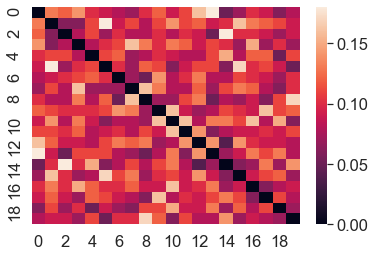

In [13]:
pattern_overlap = ps.pattern_overlap_matrix(memories)
sns.heatmap(pattern_overlap);

<AxesSubplot:>

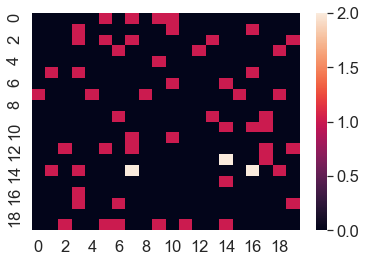

In [14]:
G = nx.from_numpy_matrix(memories.chain_transitions)
sns.heatmap(memories.chain_transitions)




In [16]:
starting_map = 1
net = nt.Network(J=memories.interaction_matrix, 
                 transfer_func=nt.ReLu,
                 dynamic_func=nt.net_dynamics)

initial_config = ps.build_correlated_activity(memories,starting_map,position=0.1)
initial_config = initial_config/np.mean(initial_config)
net.run_dynamics(initial_config,n_steps=100,sparsity=DYNAMIC_SPARISTY)

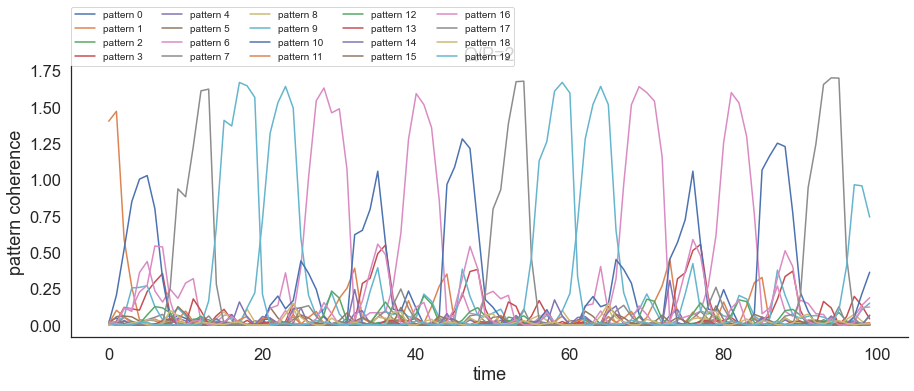

In [17]:
coherence = fs.coherence_timecourse(memories,net.history)
attractors = fs.attractors_timecourse(memories,net.history)
retrieved_sequence = fs.retrieved_sequence(memories,net.history)

plt.figure(figsize=(15,5))
for i,timecourse in enumerate(coherence):
    plt.plot(timecourse,label=f'pattern {i}')
plt.legend()

sns.despine()
plt.title('Q/P=2')
plt.xlabel('time')
plt.ylabel('pattern coherence')
plt.legend(fontsize = 10,loc=(0,1),ncol=5)

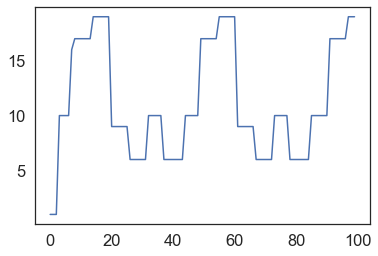

In [18]:
plt.plot(attractors)

In [9]:
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed
import ipywidgets as widgets


def plot_frame(m,i):
    fig = plt.figure(figsize=(10,5))
    v = net.history[i]
    x = [memories.patterns[m][cell] for cell in memories.patterns[m].keys()]
    idxs = [cell for cell in memories.patterns[m].keys()]
    plt.scatter(x,v[idxs])

def plot_dynamics():
    interact(plot_frame,
             m = widgets.IntSlider(min=0, max=(len(memories.patterns)-1), value=0),
             i = widgets.IntSlider(min=0, max=(len(net.history)-1), value=0))




In [10]:
plot_dynamics()

interactive(children=(IntSlider(value=0, description='m', max=19), IntSlider(value=0, description='i', max=99)…